In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv"
df = pd.read_csv(url)

In [ ]:
import plotly.graph_objects as go
import numpy as np

In [ ]:
df.shape

(178, 14)

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
# renomeando as colunas
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po',
                          'Ash_Alcanity' : 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio', 
                          'Color_Intensity' : 'Intensidade_de_cor'})

In [ ]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
# os dados varia muito.
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
# agr a relação que existe entre as variáveis, para saber qual é importante manter e qual não é
matriz_corr = df.corr()
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [ ]:
pip install biokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 3.4 MB/s 
     |████████████████████████████████| 47 kB 2.8 MB/s 
     |████████████████████████████████| 964 kB 29.5 MB/s 
     |████████████████████████████████| 2.3 MB 13.4 MB/s 
     |████████████████████████████████| 51 kB 527 kB/s 
     |████████████████████████████████| 47 kB 4.6 MB/s 
     |████████████████████████████████| 144 kB 47.8 MB/s 
     |████████████████████████████████| 5.8 MB 45.6 MB/s 
     |████████████████████████████████| 251 kB 71.2 MB/s 
     |████████████████████████████████| 3.2 MB 35.0 MB/s 
     |████████████████████████████████| 121 kB 58.0 MB/s 
     |████████████████████████████████| 90 kB 8.1 MB/s 
     |████████████████████████████████| 100 kB 8.6 MB/s 
     |████████████████████████████████| 84 kB 2.7 MB/s 
     |████████████████████████████████| 127 kB 53.5 MB/s 
  Created wheel for biokit: filename=biokit

In [ ]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


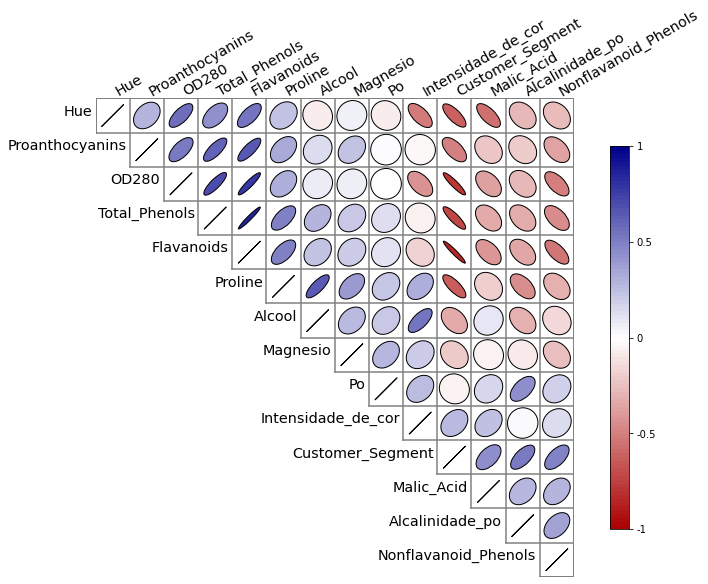

In [ ]:
# criando um gráfico de correlação para as nossas variáveis
# a cor azul tem correlação positiva a vermelha tem correlação negativa
# se a elipse tiver uma linha reta, significa que tem uma correlação perfeita
# total_phenols e flavanoids tem qquase uma correlação perfeita
# então podemos tirar 1 para economizar custos 
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(20, 12)

In [ ]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
# a maioria dos modelos de M.L e clustering não trabalham bem com dados que variam bastante
# então é uma boa normalizar os dados
atributos = df.columns

In [ ]:
# vamos fazer uma normalização pelo minimo e maximo
for atributo in atributos:
  df[atributo] = (df[atributo]-min(df[atributo]))/(max(df[atributo])-min(df[atributo]))

In [ ]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [ ]:
# agr todos os nossos dados foram normalizados entre 0 e 1
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# vamos usar uma biblioteca para normalizar, ao inves de fazer na mao
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# utilizando o metodo fit, ele retorna um numpy array e dps
# precisamos transforma-lo devolta a um dataframe
np_df = min_max_scaler.fit_transform(df)
# transformando o numpy array para df
df = pd.DataFrame(np_df, columns = atributos)

In [ ]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [ ]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# essa função ele reverte a transformação voltando ao que era antes
# e retorna um numpy array
np_df = df = min_max_scaler.inverse_transform(df)

In [ ]:
df = pd.DataFrame(np_df, columns = atributos)

In [ ]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# agr que fizemos a adquação dos dados, vamos agrupalos
from sklearn.cluster import KMeans

In [ ]:
# numero de grupos que queremos agrupar a nossa base de dados
agrupador = KMeans(n_clusters = 3)

In [ ]:
agrupador.fit(df)

KMeans(n_clusters=3)

In [ ]:
# com esse metodo conseguimos ver a onde cada registro do banco de dados foi agrupado
# 4 grupos de 0 a 3 e cada linha foi colocado em um desses 4 grupos
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# o agrupador ele separa do ponto que ele começou, então ele só inverteu a ordem 
# do agrupamento, pois ele começou ja com 1 agrupamento
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# apresentando o agrupamento com gráfico
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'],
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

# cada cor é um grupo separado pelo kmeans
# como o grafico é 2D, tem a impressão que os grupos se sobrepõe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
# criando um gráfico em 3D
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'],
                           y = df['Alcool'],
                           z = df['Proline'],
                           mode = 'markers',
                           marker = dict(color = labels.astype(np.float)),
                           text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
fig.update_layout(scene = dict(
    xaxis_title = 'Internsidade de Cor',
    yaxis_title = 'Alcool',
    zaxis_title = 'Proline'
))
fig.show()

In [ ]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
1,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
2,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000


In [ ]:
# as bolinhas em vermelho é o centro de cada agrupamento
fig.add_trace(go.Scatter3d(x = centros['Intensidade_de_cor'],
                           y = centros['Alcool'],
                           z = centros['Proline'],
                           mode = 'markers',
                           marker = dict(color = 'red'),
                           text = [0, 1, 2]))
fig.show()

In [ ]:
# analise mais aprofundada de cluster
from sklearn.cluster import DBSCAN
# o parametro eps é a distancia maxima entre dois pontos para que eles possam ser considerados vizinhos ou pertecente ao mesmo cluster
# o min_samples é o numero minimo de pontos para que possa formar um cluster
# metric é uma metrica de distancia para avaliar a distancia entre os pontos
# diferente do kmeans, o algortimo calcula quantos grupos ele acha necessario criar
# pois no kmeans a gente teve que declarar.
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [ ]:
# o grupo -1 é classificado como ruido, então ele considera que qualquer ponto
# que não esteja dentro dessa distancia de 1.31 ou qualquer outro valor q vc colocar
# é considerado ruido
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [ ]:
np.unique(agrupador.labels_)

array([-1,  0,  1,  2])

In [ ]:
# o DBSCAN é um algoritmo de agrupamento espacial baseado em densidade para aplicações com ruído
# sempre que vc tiver uma região com muitos pontos com determinadas condições, temos um cluster
# as vantagens de usar o DBSCAN é que ele é robusto a outliers, pode detectar qualquer tipo de forma.
# custo computacional não é tão alto, Segundo algoritmo de clusterização mais utilizado.

# desvantagens, não funciona bem com dados de alta dimensionalidade
# ele nao consegue identificar clusters de várias densidades, uma vez que os parâmetros eps e min_samples são fixos.
# A parametrização de eps e min_samples nem sempre é uma tarefa fácil. 

In [ ]:
# com agrupador pequeno e um numero grande para considerar uma amostra
# o dbscan falou que todos os nossos dados são ruidos, então o dbscan é muito
# sensivel aos parâmetros
# a métrica de distaância importa muito, pois ela influência o eps
# o eps é calculado encima da métrica de distância
agrupador = DBSCAN(eps = 0.01, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
# o MeanShift é um cluster que não precisa passar nenhum parâmetro
# O meanshift ele não requer número de clusters igual ao kmeans
# e ele não pede os parâmetros igual ao DBSCAN, pois quando ele olha
# uma densidade, ele afirma que ali é um cluster
# o problema que ele se propõe a resolver é o mesmo do dbscan
# o mean shift pega os pontos do cluster e junta em um lugar só onde
# tem a maior densidade de pontos 
# o contexto geral é, buscar regiões de alta densidade e deslocar o centro
# dos cluster pra ela
# agrupar os pontos de acordo com as regiões de alta densidade
# O K-means não costuma apresentar um bom resultado quando há ruído e
# grupos de simetria não radial
# temos menos parâmetros para serem ajustados que o dbscan
# VANTAGENS: robusto a outliers, serve para vários tipos de aplicações,
# pode detectar qualquer tipo de forma
# tem apenas um parâmnetros para ser ajustados
# DESVANTAGENS: não funciona bem com dados de alta dimensionalidade
# a parametrização da largura de banda não é tao simples
# computacionalmente caro.
from sklearn.cluster import MeanShift
# O Mean shift é um método não paramétrico, isto é, não precisamos realizar a configuração de parâmetros para utilizá-lo
# A largura de banda define a região de cálculo das médias.
# O método Mean shift baseia-se em deslocamento de médias de distância entre pontos.

In [ ]:
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [ ]:
# a largura de banda do meanshift modifica a região pro nosso deslocamenteo de média
# não muito simples de se calcular, então vamos usar uma biblioteca do sklearn
from sklearn.cluster import estimate_bandwidth

In [ ]:
BW = estimate_bandwidth(df, quantile = 0.1)

In [ ]:
agrupador = MeanShift(bandwidth = BW)
agrupador.fit(df)
agrupador.labels_

array([ 4,  4,  8,  9,  5,  9,  7,  7,  4,  4,  9,  7,  7,  8,  9,  7,  7,
        8, 10,  6,  5,  5,  4,  4,  6,  6,  8,  7,  6,  4,  7,  9,  4,  7,
        8,  6,  6,  8,  4,  5,  5,  4,  8,  1,  6,  4,  4,  4,  4,  7,  8,
        7,  8,  7,  4,  8,  4,  7,  7,  0,  1,  3,  1,  3,  3,  1,  0,  0,
        5,  5,  6,  3,  3,  4,  6,  3,  3,  0,  5,  3,  3,  1,  1,  0,  0,
        3,  0,  2,  1,  1,  0,  3,  0,  3,  3,  6,  1,  3,  1,  3,  1,  2,
        3,  3,  1,  3,  0,  0,  3,  1,  2,  3,  2,  3,  3,  3,  0,  3,  3,
        2,  1,  3,  3,  3,  3,  3,  3,  3,  3,  2,  1,  0,  2,  2,  1,  1,
        1,  0,  2,  2,  2,  5,  0,  2,  6,  6,  3,  1,  1,  2,  0,  0,  3,
        1,  1,  5,  0,  6,  1,  1,  0,  1,  2,  1,  1,  0,  1,  1,  5,  1,
        0,  3,  1,  5,  5,  6,  6,  2])

In [ ]:
# metrica para saber se a clusterização foi boa
agrupador = KMeans(n_clusters = 5)
agrupador.fit(df)
labels = agrupador.labels_
labels

array([3, 3, 3, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 1, 0, 3, 1, 1, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 3, 4,
       0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 0, 4, 0, 2, 2, 3, 0, 2, 2, 2, 0, 2, 2, 4, 4, 2, 2, 2, 2, 4,
       4, 4, 2, 2, 2, 2, 2, 0, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 0, 2, 4, 0, 0, 2, 4, 4, 4, 2, 2, 2, 4,
       4, 4, 2, 0, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 0, 4, 2, 2, 4, 0, 0, 0,
       0, 4], dtype=int32)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'],
                           y = df['Alcool'],
                           z = df['Proline'],
                           mode = 'markers',
                           marker = dict(color = labels.astype(np.float)),
                           text = labels))
fig.show()

# percebemos que alguns pontos de um cluster x, está mais próximo aos pontos de outro
# cluster y, então pq esses pontos do cluster x não pertence ao cluster y?
# existe uma metrica de coeficiente de silhueta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
# Como saber se a clusterização por distância está boa?
# O coeficiente de silhueta, calcula um padrão de aproximidade entre os pontos
# se eu tenho muitos pontos juntos, temos um cluster, mas se eu tenho alguns
# pontos separados, é formado um cluster tambem, mesmo que um desses pontos separados
# esteja próximo a um cluster
# O objetivo do coeficiente é avaliar os pontos em uma escala de -1 a 1 em relação
# ao grupo (coesão)
# aos demais pontos (dissimilaridade).
# quanto maior o valor da silhueta dos pontos, melhor.

In [ ]:
# coeficiente pro kmeans
from sklearn. metrics import silhouette_score

In [ ]:
# como vamos ter varios clusters, criamos uma faixa para calcular o coeficiente de silhueta
faixa_n_clusters = [i for i in range(2, 10)]

In [ ]:
# lista vazia para armazenar os valores do coeficiente
from sklearn.cluster import KMeans
valores_silhueta = []
for k in faixa_n_clusters:
  agrupador = KMeans(n_clusters = k)
  # o fit_predict ele devolve direto os labels
  labels = agrupador.fit_predict(df)
  # pegando as média de cada amostra
  media_silhueta = silhouette_score(df, labels)
  valores_silhueta.append(media_silhueta)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = 'Valores de Silhueta Médio',
    xaxis_title = 'Número de Clusters',
    yaxis_title = 'Valor médio de silhueta'
)

# o maior valor de coeficiente de silhueta que a gente têm é quando K é igual a 3
# então nem adianta adicionar mais cluster, de 2 a 3 nesse exemplo é muito bom
# pq quando foi colocando mais cluster, o coeficiente foi caindo

In [ ]:
# quantil para faixa de banda do mean-shift
faixa_quantil = np.linspace(0.02, 0.5, 30)
faixa_quantil

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

In [ ]:
valores_silhueta = []
quantil_plot = []

# para cada valor na faixa quantil
for quantil in faixa_quantil:
    bandwidth = estimate_bandwidth(df, quantile = quantil)
    agrupador = MeanShift(bandwidth = bandwidth) 
    # pegando os labels direto
    labels = agrupador.fit_predict(df)

    if (len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1):   
        media_silhueta = silhouette_score(df, labels)
        valores_silhueta.append(media_silhueta)
        quantil_plot.append(quantil)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot,
                         y = valores_silhueta))
fig.update_layout(dict(xaxis_title = 'Quantil',
                       yaxis_title='Média Silhueta')),
fig.show()

# o melhor quantil é o 0.21 nesse exemplo, que nos da uma coeficiente de 0.34

In [ ]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [ ]:
agrupador_kmeans = KMeans(n_clusters = 3)
agrupador_dbscan = DBSCAN(eps = 2.1, min_samples=56,metric='manhattan')

BW = estimate_bandwidth(df, quantile = 0.28)
agrupador_meanshift = MeanShift(bandwidth = BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_dbscan.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print("Labels K-means: ", labels_kmeans)
print("Labels DBSCAN: ", labels_dbscan)
print("Labels MeanShift: ", labels_meanshift)

Labels K-means:  [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]
Labels DBSCAN:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift:  [2 2 2 3 0 3 2 2 2 2 3 2 2 2 3 2 2 2 3 1 1 

In [ ]:
print("O coeficiente de silhueta do K-means é:", silhouette_score(df, labels_kmeans))
print("O coeficiente de silhueta do DBSCAN é: ", silhouette_score(df,labels_dbscan))
print("O coeficiente de silhueta do MeanShift é: ", silhouette_score(labels_meanshift))
# Quanto melhor é uma clusterização, maior seu coeficiente de silhueta.
# O coeficiente de silhueta analisa o quanto um ponto pertencente a um cluster está próximo dos seus vizinhos de cluster e distante dos pontos dos demais clústeres.

O coeficiente de silhueta do K-means é: 0.5711220218931753


ValueError: ignored